<a href="https://colab.research.google.com/github/medvedneekowa/portfolio/blob/main/projects/project-1/Ad_Hoc_%D0%B2_%D1%82%D0%B0%D0%BA%D1%81%D0%B8_%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B0%D1%82%D0%BE%D1%80%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving city_dict.csv to city_dict.csv
Saving Data_Skytaxi.csv to Data_Skytaxi.csv
Saving tariff_dict.csv to tariff_dict.csv


In [ ]:
city_dict = pd.read_csv('city_dict.csv', sep=";")
Data_Skytaxi = pd.read_csv('Data_Skytaxi.csv', sep=";")
tariff_dict = pd.read_csv('tariff_dict.csv', sep=";")

In [ ]:
Data_Skytaxi_df = Data_Skytaxi.merge(city_dict, how='inner', on='id_city').merge(tariff_dict, how='inner', on='id_tariff')

In [ ]:
Data_Skytaxi_df.head()

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,name_city,name_tariff
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN,Казань,Эконом
1,1146340,114,11,02.08.2022 19:12,02.08.2022 19:19,02.08.2022 19:26,02.08.2022 19:50,Москва,Бизнес
2,1142747,112,13,01.08.2022 13:47,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16,Казань,Комфорт
3,1137227,111,17,03.08.2022 15:45,NaN,NaN,NaN,Тюмень,Эконом
4,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26,Казань,Эконом


In [ ]:
Data_Skytaxi_df.dtypes

,0
order_id,int64
id_tariff,int64
id_city,int64
order_time,object
assign_time,object
arrive_time,object
ride_finish_time,object
name_city,object
name_tariff,object


In [ ]:
time_columns = ['order_time', 'assign_time', 'arrive_time', 'ride_finish_time']
Data_Skytaxi_df[time_columns] = Data_Skytaxi_df[time_columns].apply(pd.to_datetime)

In [ ]:
Data_Skytaxi_df.dtypes

,0
order_id,int64
id_tariff,int64
id_city,int64
order_time,datetime64[ns]
assign_time,datetime64[ns]
arrive_time,datetime64[ns]
ride_finish_time,datetime64[ns]
name_city,object
name_tariff,object


### **Задание 1**

Изучите утренние и вечерние часы пик.




##### 1. Постройте график с количеством заказов по суточным часам (на оси Х - часы от 0 до 23).

In [ ]:
Data_Skytaxi_df['order_time_hour'] = Data_Skytaxi_df['order_time'].dt.hour
Count_order_by_hour = Data_Skytaxi_df.groupby('order_time_hour').agg(count_order=('order_time_hour', 'count')).reset_index()

In [ ]:
Count_order_by_hour

,order_time_hour,count_order
0,0,212
1,1,232
2,2,217
3,3,192
4,4,205
5,5,220
6,6,347
7,7,811
8,8,764
9,9,801


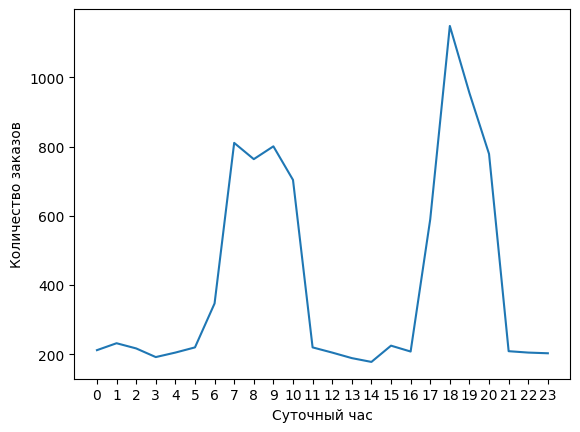

In [ ]:
plt.plot(Count_order_by_hour['order_time_hour'], Count_order_by_hour['count_order'])
plt.xticks(Count_order_by_hour['order_time_hour'])
plt.xlabel('Суточный час')
plt.ylabel('Количество заказов')
plt.show()

##### 2. На сколько за один час в среднем делается больше заказов в часы пик, чем в обычное время? (по всем городам вместе)
утренние часы пик - это 7,8,9,10, а вечерние - 17,18,19,20


In [ ]:
rush_hour = [7,8,9,10,17,18,19,20]

Data_Skytaxi_df['type_hour'] = Data_Skytaxi_df['order_time_hour'].apply(lambda x: 'rush_hour' if x in rush_hour else 'base_hour')
Avg_count_order = Data_Skytaxi_df.groupby('type_hour').agg(count_order=('order_time_hour', 'count')).reset_index()
Avg_count_order['count_hours'] = Avg_count_order['type_hour'].apply(lambda x: 8 if x == 'rush_hour' else 16)
Avg_count_order['avg_count'] = Avg_count_order ['count_order'] / Avg_count_order['count_hours']
Avg_count_order

,type_hour,count_order,count_hours,avg_count
0,base_hour,3467,16,216.6875
1,rush_hour,6553,8,819.1250


In [ ]:
difference = Avg_count_order['avg_count'][1] - Avg_count_order['avg_count'][0]
print(round(difference, 0))

602.0


##### 3. Рассмотрите города по отдельности: для каждого города выведите разницу в количестве заказов (среднечасовом) между пиковыми и не-пиковыми часами.


In [ ]:
Data_Skytaxi_city = Data_Skytaxi_df.pivot_table(index='name_city',
                                                columns='type_hour',
                                                values='order_id',
                                                aggfunc='count',
                                                fill_value=0).reset_index()
Data_Skytaxi_city['diff'] = round(Data_Skytaxi_city['rush_hour'] / 8 - Data_Skytaxi_city['base_hour'] / 16, 0)
Data_Skytaxi_city[['name_city', 'diff']]

type_hour,name_city,diff
0,Екатеринбург,35.0
1,Казань,57.0
2,Краснодар,47.0
3,Красноярск,31.0
4,Москва,183.0
5,Новосибирск,54.0
6,Санкт-Петербург,120.0
7,Тюмень,37.0
8,Хабаровск,39.0


##### 4. В каком городе наблюдается наибольшее отклонение конверсии *Order2Ride* в пиковые часы по сравнению с не-пиковыми часами?

In [ ]:
Order2Ride = Data_Skytaxi_df.groupby(['name_city','type_hour']).agg(order_count=('order_time', 'count'), ride_count=('ride_finish_time', 'count')).reset_index()
Order2Ride['CR'] = (Order2Ride['ride_count'] / Order2Ride['order_count'] * 100)
Order2Ride_dev = Order2Ride.pivot_table(index='name_city',
                                        columns='type_hour',
                                        values = 'CR').reset_index().rename(columns={'base_hour':'base_hour_CR', 'rush_hour':'rush_hour_CR'})
Order2Ride_dev.columns.name = None
Order2Ride_dev['deviation_CR'] = round(abs(Order2Ride_dev['rush_hour_CR'] - Order2Ride_dev['base_hour_CR']), 2)
Order2Ride_dev['base_hour_CR'] = round(Order2Ride_dev['base_hour_CR'], 2)
Order2Ride_dev['rush_hour_CR'] = round(Order2Ride_dev['rush_hour_CR'], 2)
Order2Ride_dev

,name_city,base_hour_CR,rush_hour_CR,deviation_CR
0,Екатеринбург,56.78,57.44,0.66
1,Казань,57.48,54.95,2.52
2,Краснодар,60.67,57.17,3.50
3,Красноярск,34.88,40.79,5.90
4,Москва,55.96,44.23,11.73
5,Новосибирск,60.58,58.46,2.12
6,Санкт-Петербург,55.61,46.32,9.29
7,Тюмень,26.99,26.60,0.39
8,Хабаровск,22.01,28.43,6.42


In [ ]:
Order2Ride_dev[['name_city', 'deviation_CR']].loc[Order2Ride_dev['deviation_CR'] == Order2Ride_dev['deviation_CR'].max()]

,name_city,deviation_CR
4,Москва,11.73


### **Задание 2**
Изучите заказы в Хабаровске и Тюмени. Эти города интересуют менеджеров, так как в них наша компания начала работать относительно недавно.

In [ ]:
task_cities = ['Хабаровск', 'Тюмень']

##### 1.На сколько процентных пунктов Order2Ride в среднем в них ниже, чем в других городах?

In [ ]:
Order2Ride_dev['avg_CR'] = (Order2Ride_dev['rush_hour_CR'] + Order2Ride_dev['base_hour_CR']) / 2
Order2Ride_dev

,name_city,base_hour_CR,rush_hour_CR,deviation_CR,avg_CR
0,Екатеринбург,56.78,57.44,0.66,57.110
1,Казань,57.48,54.95,2.52,56.215
2,Краснодар,60.67,57.17,3.50,58.920
3,Красноярск,34.88,40.79,5.90,37.835
4,Москва,55.96,44.23,11.73,50.095
5,Новосибирск,60.58,58.46,2.12,59.520
6,Санкт-Петербург,55.61,46.32,9.29,50.965
7,Тюмень,26.99,26.60,0.39,26.795
8,Хабаровск,22.01,28.43,6.42,25.220


In [ ]:
diff = 0
count = 0
new_data_row = []
for task_city in task_cities:
  for city in Order2Ride_dev['name_city']:
    task_city_index = Order2Ride_dev.loc[Order2Ride_dev['name_city'] == task_city].index
    city_index = Order2Ride_dev.loc[Order2Ride_dev['name_city'] == city].index
    task_city_cr = Order2Ride_dev['avg_CR'][task_city_index].iloc[0]
    city_cr = Order2Ride_dev['avg_CR'][city_index].iloc[0]
    if task_city_index != city_index:
      diff += task_city_cr-city_cr
      count += 1
  avg_diff = diff/count
  new_data_row.append({'name_city': task_city, 'avg_diff': avg_diff})
  print(f'Order2Ride в городе {task_city} в среднем ниже на {round(-avg_diff,2)} п.п , чем в других городах ')

result = pd.DataFrame(new_data_row)
result


Order2Ride в городе Хабаровск в среднем ниже на 24.46 п.п , чем в других городах 
Order2Ride в городе Тюмень в среднем ниже на 23.58 п.п , чем в других городах 


,name_city,avg_diff
0,Хабаровск,-24.461875
1,Тюмень,-23.575938


##### 2. За счет какого звена воронки достигается эта разница? Сделайте выводы по Хабаровску и по Тюмени по отдельности.

In [ ]:
Data_Skytaxi_city = Data_Skytaxi_df[Data_Skytaxi_df['name_city'].isin(task_cities)]
Data_Skytaxi_city = Data_Skytaxi_city.groupby(['name_city'])[time_columns].count().reset_index()
Data_Skytaxi_city

,name_city,order_time,assign_time,arrive_time,ride_finish_time
0,Тюмень,632,352,295,169
1,Хабаровск,624,213,173,164


In [ ]:
def CR_links(Data): # создание функции для расчета конверсий по всем звеньям воронки
  Data = Data.copy()
  Data['O2As'] = round(Data['assign_time'] / Data['order_time'], 2)
  Data['As2Аr'] = round(Data['arrive_time'] / Data['assign_time'], 2)
  Data['Аr2R'] = round(Data['ride_finish_time'] / Data['arrive_time'], 2)
  Data['O2R'] = round(Data['ride_finish_time'] / Data['order_time'], 2)
  return Data

In [ ]:
Data = Data_Skytaxi_city
city_CR(Data)
Data[['name_city', 'O2As', 'As2Аr', 'Аr2R', 'O2R']]

,name_city,O2As,As2Аr,Аr2R,O2R
0,Тюмень,0.56,0.84,0.57,0.27
1,Хабаровск,0.34,0.81,0.95,0.26


## Выводы

1.   ***Тюмень***:

за счет следующих звеньев случается разница : Order2Assign и Arrive2Rid, проблема на первом и последнем этапе — плохо назначаются водители и высокая доля отмен после прибытия

Order2Assign: 55.70% — довольно низкий показатель: почти половине заказов не был назначен водитель.

Возможные причины для анализа:

*   нехватка водителей
*   высокий спрос
*   сбои в системе назначения

Assign2Arrive: 83.81% — хороший показатель. Большинство водителей всё-таки доезжают до точки.

Arrive2Ride: 57.29% — низкий показатель. Почти половина поездок отменяется на момент прибытия водителя.

Возможные причины для анализа:   

*   долгое ожидание
*   клиент уехал другим способом
*   плохая коммуникация с водителем/пассажиром
*   ошибки в локации

2.  ***Хабаровск***:

основная проблема — назначение водителя. Но если доехали — поездка почти гарантирована.

 Order2Assign: 34.13% — ещё хуже, чем в Тюмени. Только треть заказов доходит до назначения водителя.

 Assign2Arrive: 81.22% — чуть ниже, чем в Тюмени, но всё ещё приемлемо.

 Arrive2Ride: 94.80% — отличный показатель. Почти все клиенты, к которым приехал водитель, садятся в машину

---



Проанализируем конверсию на каждом этапе воронки в Тюмени и Хабаровске отдельно

In [ ]:
# функция для определения конверсии всех звеньев воронки по тарифам в определенном городе

def tafiff_CR(city):
  Data_Skytaxi_city = Data_Skytaxi_df[Data_Skytaxi_df['name_city'].isin(city)]
  Data_Skytaxi_city = Data_Skytaxi_city.groupby(['name_tariff'])[time_columns].count().reset_index()
  Data_Skytaxi_city = CR_links(Data_Skytaxi_city)
  return Data_Skytaxi_city[['name_tariff', 'O2As', 'As2Аr', 'Аr2R', 'O2R']]

In [ ]:
city = ['Тюмень']
tafiff_CR(city)

,name_tariff,O2As,As2Аr,Аr2R,O2R
0,Бизнес,0.19,0.95,1.00,0.18
1,Доставка,0.25,0.73,0.88,0.16
2,Комфорт,0.74,0.85,0.54,0.34
3,Комфорт+,0.72,0.81,0.35,0.20
4,Эконом,0.61,0.84,0.59,0.30


Выводы

По тарифам:
1. Бизнес

Order2Assign: 18.63% — крайне низкая доступность: почти 82% заказов остаются без водителя.

Причины:

Очень мало водителей бизнес-класса;

Высокие требования к авто/водителям;

Низкий спрос и, как следствие, низкая мотивация подключать водителей.

Assign2Arrive: 94.74% — если водитель назначен, он почти всегда доезжает.

Arrive2Ride: 100.00% — клиент всегда садится в машину после прибытия. Отличный показатель.

 Вывод: Тариф «Бизнес» страдает от острой нехватки водителей, но работает идеально, если заказ принят.

 2. Доставка

Order2Assign: 25.00% — низкий уровень назначения. Возможны:

Мало водителей, готовых брать доставку;

Слабая интеграция процесса логистики;

Недостаточная мотивация водителей.

Assign2Arrive: 72.73% — хуже среднего, часты отмены со стороны водителя или проблемы с локацией.

Arrive2Ride: 87.50% — хороший показатель, но всё же есть отмены.

 Вывод: требуется усилить сегмент доставки — привлечь больше водителей и улучшить маршрутизацию/сервисы поддержки.

 3. Комфорт

Order2Assign: 74.24% — высокий уровень назначения, значит достаточно водителей.

Assign2Arrive: 84.69% — стабильно.

Arrive2Ride: 54.22% — проблема! Почти половина клиентов отказывается ехать, даже когда водитель прибыл.

Причины:

Долгое ожидание;

Низкое качество авто (несоответствие ожиданиям);

Плохая коммуникация;

Возможно, дублирующие заказы на нескольких сервисах.

Вывод: нужно разбираться с причинами отказов — возможно, потребуется точечная работа по качеству сервиса, ожиданию, информированию клиента.

4. Комфорт+

Order2Assign: 72.15% — как и у «Комфорта», всё неплохо с назначением.

Assign2Arrive: 80.70% — немного хуже, возможно больше отмен со стороны водителей.

Arrive2Ride: 34.78% — критически низкий показатель, почти две трети поездок не начинаются после прибытия.

Причины могут быть схожими с «Комфортом», но усугублены:

Несоответствие ожиданиям (люди ожидают высокий уровень);

Высокая цена вызывает отказ в последний момент;

Клиенты перезаказывают более дешёвый тариф.

Вывод: требуется детальный анализ поведения пассажиров, возможно, стоит пересмотреть позиционирование и тарифную политику.

5. Эконом

Order2Assign: 60.73% — нормально, но ниже, чем у "Комфорт".

Assign2Arrive: 83.83% — стабильно.

Arrive2Ride: 59.29% — также проблемный этап, много отказов на момент прибытия.

 Вывод: как и с «Комфортом», высокий процент отмен после прибытия. В эконом-сегменте это может быть связано с низким качеством сервиса или массовым параллельным бронированием.

 ---

In [ ]:
city = ['Хабаровск']
tafiff_CR(city)

,name_tariff,O2As,As2Аr,Аr2R,O2R
0,Бизнес,0.46,0.77,0.94,0.34
1,Доставка,0.34,0.75,0.92,0.23
2,Комфорт,0.07,0.90,1.00,0.06
3,Комфорт+,0.16,0.58,0.86,0.08
4,Эконом,0.50,0.85,0.95,0.41


Выводы по тарифам:

1. Бизнес

Order2Assign: 46.32% — менее половины заказов получают водителя.

Возможные причины:

Мало доступных водителей;

Высокие требования к авто/водителям;

Assign2Arrive: 77.27% — каждый четвёртый назначенный водитель не доезжает до клиента.

Arrive2Ride: 94.12% — высокий показатель, значит, клиенты редко отказываются после прибытия.

Вывод: нужно увеличивать парк и снижать барьер входа для водителей бизнес-класса, а также работать над снижением отмен со стороны водителей.

2. Доставка

Order2Assign: 34.04% — каждый третий заказ получает исполнителя.

 Причины:

Мало исполнителей, готовых заниматься доставкой;

Слабая логистика и непривлекательные заказы.

Assign2Arrive: 75.00% — каждый четвертый не доезжает.

Arrive2Ride: 91.67% — хорошие шансы на завершение, если прибыл.

 Вывод: нужно стимулировать водителей брать доставку, возможно, через бонусы и оптимизацию логистики.


 3. Комфорт

Order2Assign: 6.94% — крайне низкий показатель — почти все заказы не получают водителя.
 Возможные причины:

Очень малый парк на этом тарифе;

Водители переключаются на другие тарифы;

Отсутствие спроса/предложения в нужное время.

Assign2Arrive: 90.00% — те, кто назначен, доезжают почти всегда.

Arrive2Ride: 100.00% — все клиенты садятся в машину.

 Вывод: тариф полностью недоразвит, но работает идеально при наличии водителя. Стоит срочно увеличивать предложение в этом классе.

 4. Комфорт+

Order2Assign: 15.58% — низкое количество назначений.

Assign2Arrive: 58.33% — почти половина водителей не доезжает. Очень плохой показатель.

Возможные причины:

Отказы из-за пробок, смены статуса, плохой навигации.

Arrive2Ride: 85.71% — умеренный уровень отказов после прибытия.

 Вывод: здесь двойная проблема — нехватка водителей и высокий процент отмен со стороны водителей. Стоит провести работу с водителями: Почему отказываются?

5. Эконом

Order2Assign: 50.19% — каждый второй заказ получает водителя. Для "эконома" это низковато.

Assign2Arrive: 84.73% — нормальный показатель.

Arrive2Ride: 95.50% — отлично, клиенты редко отменяют после прибытия.

 Вывод: «Эконом» — самый рабочий тариф в Хабаровске. Основные проблемы всё же на этапе назначения — это можно компенсировать за счёт расширения предложения.

##### 3. Какие рекомендации вы можете дать локальным менеджерам?

Рекомендации:

Тюмень:

*   Улучшить UX после прибытия водителя (например, уведомления);
*   Анализ причин отмен при прибытии — опросы, лог событий.

Хабаровск:


*   Решать проблему с назначением водителей (исключить технические ошибки в назначении)
*   Возможно стимулировать водителей выходить в пиковые часы или увеличить зону покрытия

### Задание 3

К вам обратились коллеги из отдела антифрода (отдела, предотвращающего мошенничество). У них есть подозрение, что некоторые водители “мимикрируют координаты”, то есть на самом деле не приезжают в точку А своего заказа, но в приложение посылают сигнал, что они в эту точку А приехали. Таким образом они вынуждают клиента отменить заказ после “прибытия ими в точку А”.

Постарайтесь локализовать данную проблему и выделить города, в которых такое происходит чаще всего.

In [ ]:
Data_Skytaxi_all_city_CR = Data_Skytaxi_df.groupby(['name_city', 'name_tariff'])[time_columns].count().reset_index()
Data_Skytaxi_all_city_CR['shape_of_suspicious_orders'] =  round((1 - Data_Skytaxi_all_city_CR['ride_finish_time'] / Data_Skytaxi_all_city_CR['arrive_time']) * 100, 2)
Data_Skytaxi_all_city_CR[['name_city', 'name_tariff', 'shape_of_suspicious_orders']].loc[Data_Skytaxi_all_city_CR['shape_of_suspicious_orders'] > 10]


,name_city,name_tariff,shape_of_suspicious_orders
3,Екатеринбург,Комфорт+,10.64
16,Красноярск,Доставка,28.00
17,Красноярск,Комфорт,34.25
18,Красноярск,Комфорт+,42.50
19,Красноярск,Эконом,41.76
36,Тюмень,Доставка,12.50
37,Тюмень,Комфорт,45.78
38,Тюмень,Комфорт+,65.22
39,Тюмень,Эконом,40.71
43,Хабаровск,Комфорт+,14.29


### Задание 4

Тариф “Доставка” был запущен недавно на всей России. Изучите конверсии в рамках данного тарифа по городам, локализуйте просадку конверсии *Order2Ride* в рамках данного тарифа и дайте рекомендации отделу операционистов, которые занимаются этим тарифом.

Исключаем из рассмотрения города, в которых недостаточно наблюдений для оценки

In [ ]:
delivery_df = Data_Skytaxi_df.loc[Data_Skytaxi_df['name_tariff'] == 'Доставка'].copy()
delivery_df.head()


,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,name_city,name_tariff,order_time_hour,tupe_hour,type_hour
16,1143951,115,16,2022-02-08 14:55:00,2022-02-08 14:58:00,2022-02-08 15:23:00,NaT,Красноярск,Доставка,14,base_hour,base_hour
40,1139554,115,12,2022-06-08 00:14:00,2022-06-08 00:19:00,2022-06-08 00:36:00,2022-06-08 00:54:00,Санкт-Петербург,Доставка,0,base_hour,base_hour
43,1139537,115,11,2022-05-08 20:38:00,2022-05-08 20:42:00,2022-05-08 20:59:00,2022-05-08 21:22:00,Москва,Доставка,20,rush_hour,rush_hour
62,1145302,115,11,2022-07-08 08:15:00,2022-07-08 08:18:00,2022-07-08 08:39:00,2022-07-08 09:00:00,Москва,Доставка,8,rush_hour,rush_hour
75,1146168,115,12,2022-04-08 06:23:00,2022-04-08 06:27:00,2022-04-08 06:45:00,2022-04-08 07:06:00,Санкт-Петербург,Доставка,6,base_hour,base_hour


In [ ]:
delivery_count_order = delivery_df.groupby(['name_city'])['order_id'].count().reset_index().rename(columns={'order_id':'count_order'})
delivery_count_order

,name_city,count_order
0,Екатеринбург,47
1,Казань,55
2,Краснодар,2
3,Красноярск,38
4,Москва,220
5,Новосибирск,65
6,Санкт-Петербург,137
7,Тюмень,44
8,Хабаровск,47


In [ ]:
q = delivery_count_order['count_order'].quantile(0.25) # нижний квартиль (определяем ниже какого порога явно "слабые" случаи по числу наблюдений)
q

np.float64(44.0)

In [ ]:
name_city_filtered = []
for city in delivery_count_order['name_city']:
  city_index = delivery_count_order.loc[delivery_count_order['name_city'] == city].index
  if delivery_count_order['count_order'][city_index].iloc[0] >= q:
    name_city_filtered.append(city)
print(name_city_filtered)

delivery_df_filtered = delivery_df.loc[delivery_df['name_city'].isin(name_city_filtered)]

['Екатеринбург', 'Казань', 'Москва', 'Новосибирск', 'Санкт-Петербург', 'Тюмень', 'Хабаровск']


Расчитаем конверсии-звенья O2R в данных городах и визуализируем их с доверительными интервалами для конверсий

In [ ]:
problem_city_delivery = delivery_df.loc[delivery_df['name_city'].isin(name_city_filtered)]

problem_city_delivery= problem_city_delivery.groupby('name_city')[time_columns].count().reset_index()

problem_city_delivery= CR_links(problem_city_delivery)

problem_city_delivery[['name_city', 'O2As', 'As2Аr', 'Аr2R', 'O2R']]

,name_city,O2As,As2Аr,Аr2R,O2R
0,Екатеринбург,0.79,0.84,0.90,0.60
1,Казань,0.76,0.81,0.97,0.60
2,Москва,0.70,0.76,0.95,0.51
3,Новосибирск,0.66,0.91,0.97,0.58
4,Санкт-Петербург,0.73,0.74,0.95,0.51
5,Тюмень,0.25,0.73,0.88,0.16
6,Хабаровск,0.34,0.75,0.92,0.23


In [ ]:
# Определение доверительного интервала - диапазона значений, в котором с определённой вероятностью (95%) находится истинное значение конверсии
# расчет по формуле доверительного интервала для доли : для вероятности 95% z = 1.96

problem_city_delivery['O2AS_upper'] = problem_city_delivery['O2As'] + 1.96 * (problem_city_delivery['O2As'] * (1 - problem_city_delivery['O2As']) / problem_city_delivery['order_time']).apply(np.sqrt)
problem_city_delivery['O2AS_lower'] = problem_city_delivery['O2As'] - 1.96 * (problem_city_delivery['O2As'] * (1 - problem_city_delivery['O2As']) / problem_city_delivery['order_time']).apply(np.sqrt)

problem_city_delivery['AS2AR_upper'] = problem_city_delivery['As2Аr'] + 1.96 * (problem_city_delivery['As2Аr'] * (1 - problem_city_delivery['As2Аr']) / problem_city_delivery['assign_time']).apply(np.sqrt)
problem_city_delivery['AS2AR_lower'] = problem_city_delivery['As2Аr'] - 1.96 * (problem_city_delivery['As2Аr'] * (1 - problem_city_delivery['As2Аr']) / problem_city_delivery['assign_time']).apply(np.sqrt)

problem_city_delivery['AR2R_upper'] = problem_city_delivery['Аr2R'] + 1.96 * (problem_city_delivery['Аr2R'] * (1 - problem_city_delivery['Аr2R']) / problem_city_delivery['arrive_time']).apply(np.sqrt)
problem_city_delivery['AR2R_lower'] = problem_city_delivery['Аr2R'] - 1.96 * (problem_city_delivery['Аr2R'] * (1 - problem_city_delivery['Аr2R']) / problem_city_delivery['arrive_time']).apply(np.sqrt)

problem_city_delivery['O2R_upper'] = problem_city_delivery['O2R'] + 1.96 * (problem_city_delivery['O2R'] * (1 - problem_city_delivery['O2R']) / problem_city_delivery['order_time']).apply(np.sqrt)
problem_city_delivery['O2R_lower'] = problem_city_delivery['O2R'] - 1.96 * (problem_city_delivery['O2R'] * (1 - problem_city_delivery['O2R']) / problem_city_delivery['order_time']).apply(np.sqrt)

problem_city_delivery


,name_city,order_time,assign_time,arrive_time,ride_finish_time,O2As,As2Аr,Аr2R,O2R,O2AS_upper,O2AS_lower,AS2AR_upper,AS2AR_lower,AR2R_upper,AR2R_lower,O2R_upper,O2R_lower
0,Екатеринбург,47,37,31,28,0.79,0.84,0.90,0.60,0.906448,0.673552,0.958129,0.721871,1.005608,0.794392,0.740060,0.459940
1,Казань,55,42,34,33,0.76,0.81,0.97,0.60,0.872872,0.647128,0.928645,0.691355,1.027341,0.912659,0.729473,0.470527
2,Москва,220,155,118,112,0.70,0.76,0.95,0.51,0.760556,0.639444,0.827236,0.692764,0.989324,0.910676,0.576058,0.443942
3,Новосибирск,65,43,39,38,0.66,0.91,0.97,0.58,0.775162,0.544838,0.995539,0.824461,1.023539,0.916461,0.699988,0.460012
4,Санкт-Петербург,137,100,74,70,0.73,0.74,0.95,0.51,0.804343,0.655657,0.825972,0.654028,0.999658,0.900342,0.593710,0.426290
5,Тюмень,44,11,8,7,0.25,0.73,0.88,0.16,0.377947,0.122053,0.992363,0.467637,1.105187,0.654813,0.268325,0.051675
6,Хабаровск,47,16,12,11,0.34,0.75,0.92,0.23,0.475431,0.204569,0.962176,0.537824,1.073499,0.766501,0.350314,0.109686


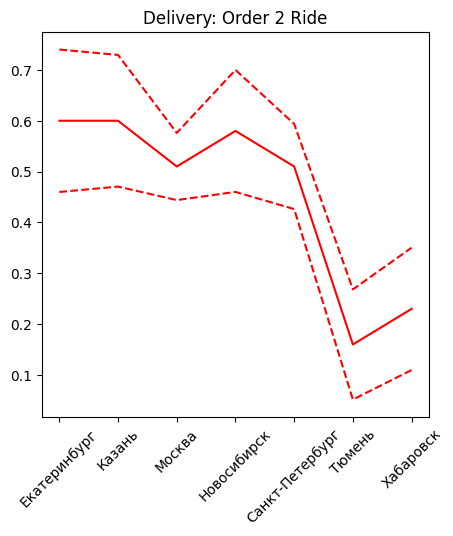

In [ ]:
plt.figure()
plt.rcParams["figure.figsize"] = (5,5)

plt.plot(problem_city_delivery['name_city'], problem_city_delivery['O2R'], color = 'red')
plt.plot(problem_city_delivery['name_city'], problem_city_delivery['O2R_upper'], color = 'red', linestyle='--')
plt.plot(problem_city_delivery['name_city'], problem_city_delivery['O2R_lower'], color = 'red', linestyle='--')

plt.xticks(rotation=45)
plt.title('Delivery: Order 2 Ride')
plt.show()

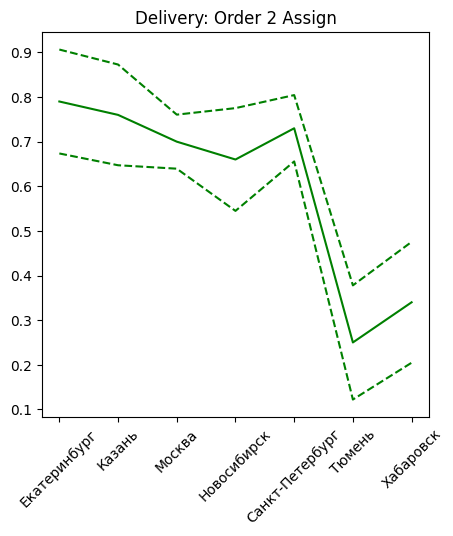

In [ ]:
plt.figure()
plt.rcParams["figure.figsize"] = (5,5)

plt.plot(problem_city_delivery['name_city'], problem_city_delivery['O2As'], color = 'green')
plt.plot(problem_city_delivery['name_city'], problem_city_delivery['O2AS_upper'], color = 'green', linestyle='--')
plt.plot(problem_city_delivery['name_city'], problem_city_delivery['O2AS_lower'], color = 'green', linestyle='--')

plt.xticks(rotation=45)
plt.title('Delivery: Order 2 Assign')
plt.show()

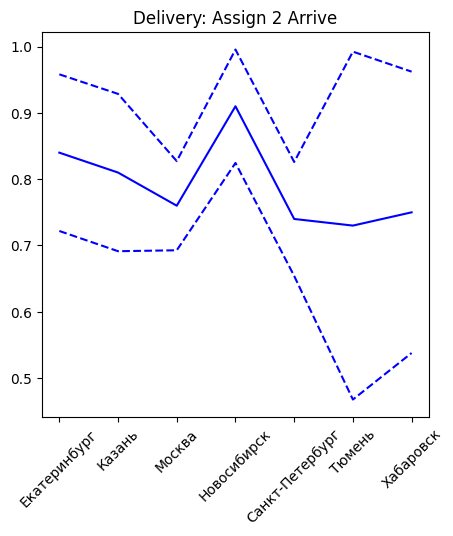

In [ ]:
plt.figure()
plt.rcParams["figure.figsize"] = (5,5)

plt.plot(problem_city_delivery['name_city'], problem_city_delivery['As2Аr'], color = 'blue')
plt.plot(problem_city_delivery['name_city'], problem_city_delivery['AS2AR_upper'], color = 'blue', linestyle='--')
plt.plot(problem_city_delivery['name_city'], problem_city_delivery['AS2AR_lower'], color = 'blue', linestyle='--')

plt.xticks(rotation=45)
plt.title('Delivery: Assign 2 Arrive')
plt.show()

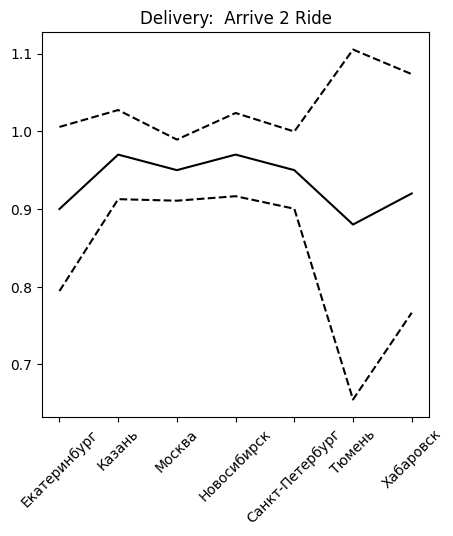

In [ ]:
plt.figure()
plt.rcParams["figure.figsize"] = (5,5)

plt.plot(problem_city_delivery['name_city'], problem_city_delivery['Аr2R'], color = 'black')
plt.plot(problem_city_delivery['name_city'], problem_city_delivery['AR2R_upper'], color = 'black', linestyle='--')
plt.plot(problem_city_delivery['name_city'], problem_city_delivery['AR2R_lower'], color = 'black', linestyle='--')

plt.xticks(rotation=45)
plt.title('Delivery:  Arrive 2 Ride')
plt.show()

Выводы

1. Казань
O2R = 60% (CI: 47–72%) — лучшая воронка доставки
AR2R = 97% — если курьер приехал, доставка почти всегда завершается
Вывод: операционная система работает чётко, возможно, хорошее покрытие курьерами

Рекомендация: Поддерживать уровень, использовать как эталон для других городов

2. Новосибирск
O2R = 58% (CI: 46–70%)
Очень высокая AS2AR = 90% — курьеры доезжают
AR2R = 97% — и почти всегда доставляют
Проблема: O2AS = 66% — только 2/3 заказов получают исполнителя
Рекомендация: расширить пул курьеров или улучшить алгоритм назначения

3. Москва
O2R = 51% (CI: 44–57%) — средний результат
Основная проблема: O2AS = 70% — 30% заказов остаются без назначения
Дальше — всё надёжно (AR2R = 94%)
Рекомендация: как и в Новосибирске — усилить фазу назначения

4. Санкт-Петербург
O2R = 51% (CI: 42–59%)
Сильно проседает AS2AR = 74% — 26% курьеров не доезжают
Рекомендация: анализировать причины срывов (GPS, отмены, пробки), возможно — обучение курьеров

5. Екатеринбург
O2R = 59% (CI: 45–73%) — вроде хорошо
Но широкие интервалы → малый объём данных
Рекомендация: Собрать больше данных, чтобы уверенно оценить результат

6. Тюмень / Хабаровск (**проблемные точки**)
O2R = 16% и 23%
Очень малая O2AS: 25% и 34% заказов получают исполнителя
Огромные доверительные интервалы → мало данных (по 40–50 заказов)

Рекомендации:

Расширять охват: курьеры, регионы
Улучшать интерфейс подачи заявок
Возможно, протестировать включение внешних партнёров или франшиз



4. Визуализируйте O2R доставки по сравнению с O2R других тарифов

In [ ]:
O2R_tariff = Data_Skytaxi_df.groupby(['name_tariff','name_city']).agg(count_order=('order_time', 'count'),
                                                                      count_finish=('ride_finish_time', 'count')).reset_index()

O2R_tariff['O2R']=O2R_tariff['count_finish'] / O2R_tariff['count_order']
O2R_tariff = O2R_tariff.pivot_table(index = 'name_tariff',
                                    aggfunc = 'mean',
                                    values = 'O2R'
                                    ).reset_index()

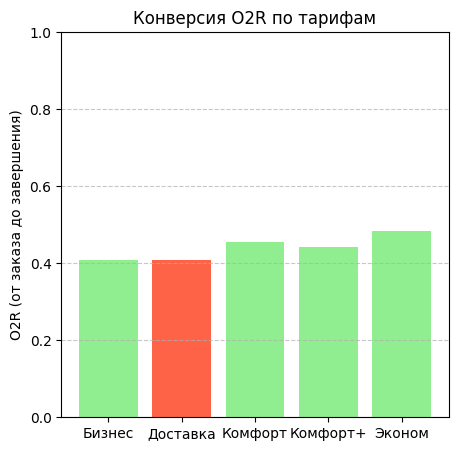

In [ ]:
colors = ['lightgreen' if tariff != 'Доставка' else 'tomato' for tariff in O2R_tariff['name_tariff']]

plt.bar(O2R_tariff['name_tariff'], O2R_tariff['O2R'], color=colors)

plt.title('Конверсия O2R по тарифам')
plt.ylabel('O2R (от заказа до завершения)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Выводы

на этом графике все конверсии O2R находятся примерно на одном уровне, колеблясь в узком диапазоне от ~41% до ~49%. Это говорит о:

*  схожих узких местах и механике на всех тарифах (например, одинаковые алгоритмы назначения, поведение клиентов и водителей/курьеров).

Тариф "Доставка" показывает результат сопоставимый с другими



